In [1]:
#Still called linear regression {Linear combination of parameters Theta}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
file='../Position_Salaries.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n',data.shape)
data.head()

Position    object
Level        int64
Salary       int64
dtype: object 
 (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Preprocesssing

In [5]:
data['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [6]:
data['Level'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

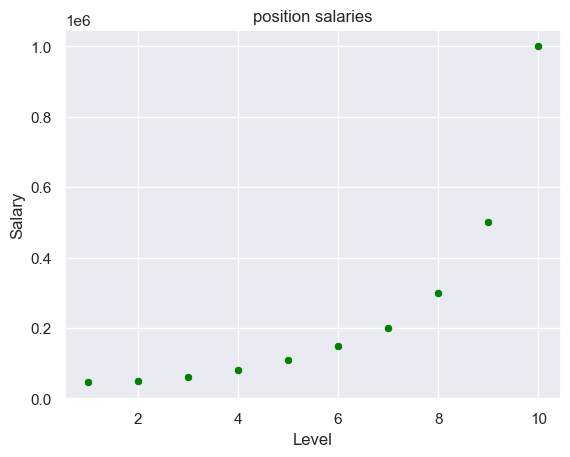

In [9]:
plt.figure()
sns.scatterplot(data=data,x='Level',y='Salary',color='green')
plt.title('position salaries')
plt.show()

In [10]:
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

### Organizing/splitting the features

In [74]:
inputs=np.array(data['Level']).reshape(data.shape[0],1)
target=np.array(data['Salary']).reshape(data.shape[0],1)

In [75]:
poly_feat2=PolynomialFeatures(degree=2).fit_transform(inputs)
poly_feat5=PolynomialFeatures(degree=5).fit_transform(inputs)

### Fiting linear model

In [78]:
lr_deg2=LinearRegression().fit(poly_feat2,target)
lr_deg5=LinearRegression().fit(poly_feat5,target)

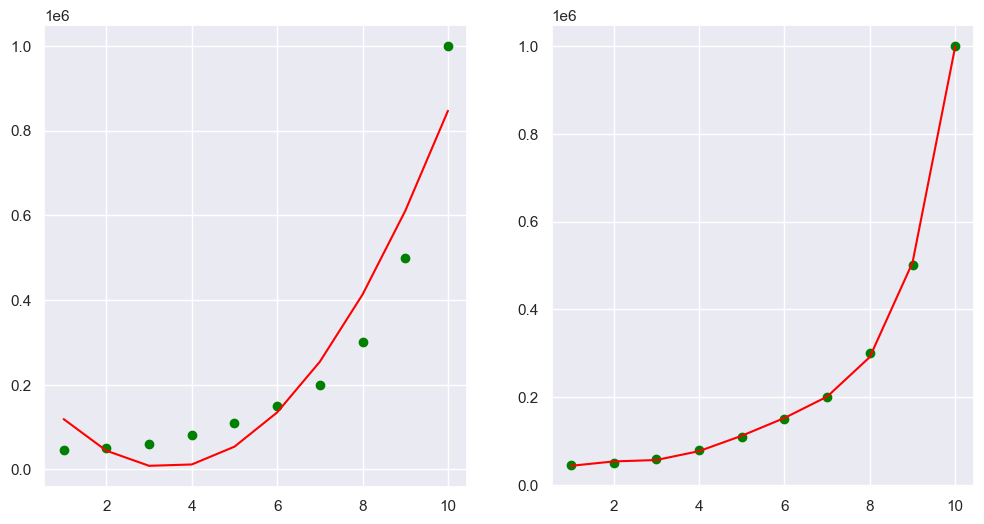

In [80]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

#fig1
ax[0].scatter(data['Level'],data['Salary'],color='green')
ax[0].plot(data['Level'],lr_deg2.predict(poly_feat2),color='red')
#fig2
ax[1].scatter(data['Level'],data['Salary'],color='green')
ax[1].plot(data['Level'],lr_deg5.predict(poly_feat5),color='red')
plt.show()

### Predictions

In [96]:
x_test=np.array(6.5).reshape(1,1)
x_test2=PolynomialFeatures(degree=2).fit_transform(x_test)
x_test5=PolynomialFeatures(degree=5).fit_transform(x_test)
y_pred2=lr_deg2.predict(x_test2)
y_pred5=lr_deg5.predict(x_test5)
print(y_pred2,'|',y_pred5)

[[189498.10606061]] | [[174878.07765159]]


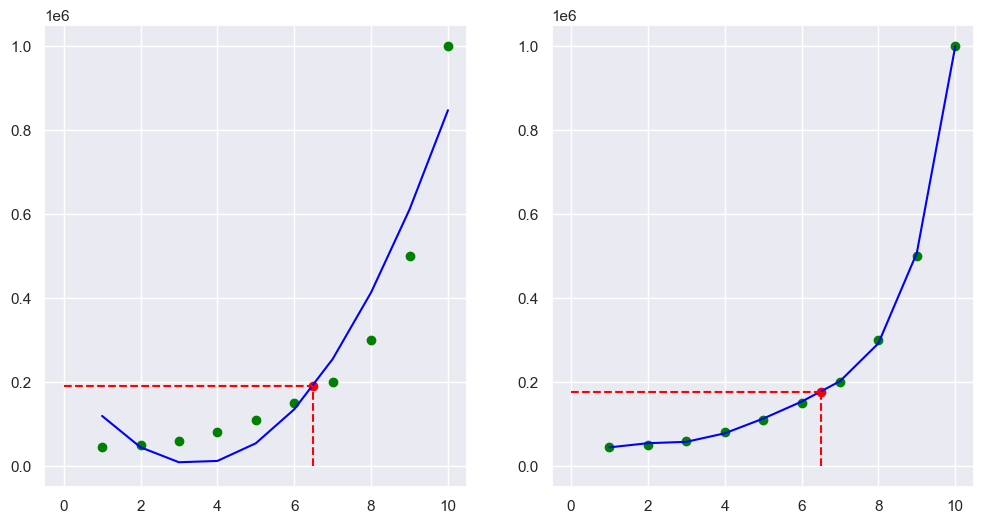

In [110]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

#fig1
ax[0].scatter(data['Level'],data['Salary'],color='green')
ax[0].plot(data['Level'],lr_deg2.predict(poly_feat2),color='blue')
ax[0].scatter(6.5,y_pred2,color='red')
ax[0].vlines(6.5,ymin=0,ymax=y_pred2,color='red',linestyle='--')
ax[0].hlines(y_pred2,xmin=0,xmax=6.5,color='red',linestyle='--')
#fig2
ax[1].scatter(data['Level'],data['Salary'],color='green')
ax[1].plot(data['Level'],lr_deg5.predict(poly_feat5),color='blue')
ax[1].scatter(6.5,y_pred5,color='red')
ax[1].vlines(6.5,ymin=0,ymax=y_pred5,color='red',linestyle='--')
ax[1].hlines(y_pred5,xmin=0,xmax=6.5,color='red',linestyle='--')
plt.show()